<a href="https://colab.research.google.com/github/shrish4753/Time-Series-analysis-of-Gold-price/blob/main/Time_Series_Analysis_of_Gold_price_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')


In [4]:
df=pd.read_csv("/content/gold_monthly_csv.csv")
df.head(10)

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73
5,1950-06,34.73
6,1950-07,34.73
7,1950-08,34.73
8,1950-09,34.73
9,1950-10,34.73


In [5]:
df.shape

(847, 2)

In [7]:
print(f"Date range of gold price available from {df['Date'].min()} to {df['Date'].max()}")


Date range of gold price available from 1950-01 to 2020-07


In [8]:
date=pd.date_range(start='1/1/1950',end='8/1/2010',freq='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2009-10-31', '2009-11-30', '2009-12-31', '2010-01-31',
               '2010-02-28', '2010-03-31', '2010-04-30', '2010-05-31',
               '2010-06-30', '2010-07-31'],
              dtype='datetime64[ns]', length=727, freq='M')

In [11]:
# Assuming 'Date' is the name of your date column and 'date' is the name of the new 'month' column
df['month'] = df['Date']
df.drop(columns='Date', inplace=True)
df.set_index('month', inplace=True)



In [12]:
df.head()

,Price
month,
1950-01,34.73
1950-02,34.73
1950-03,34.73
1950-04,34.73
1950-05,34.73


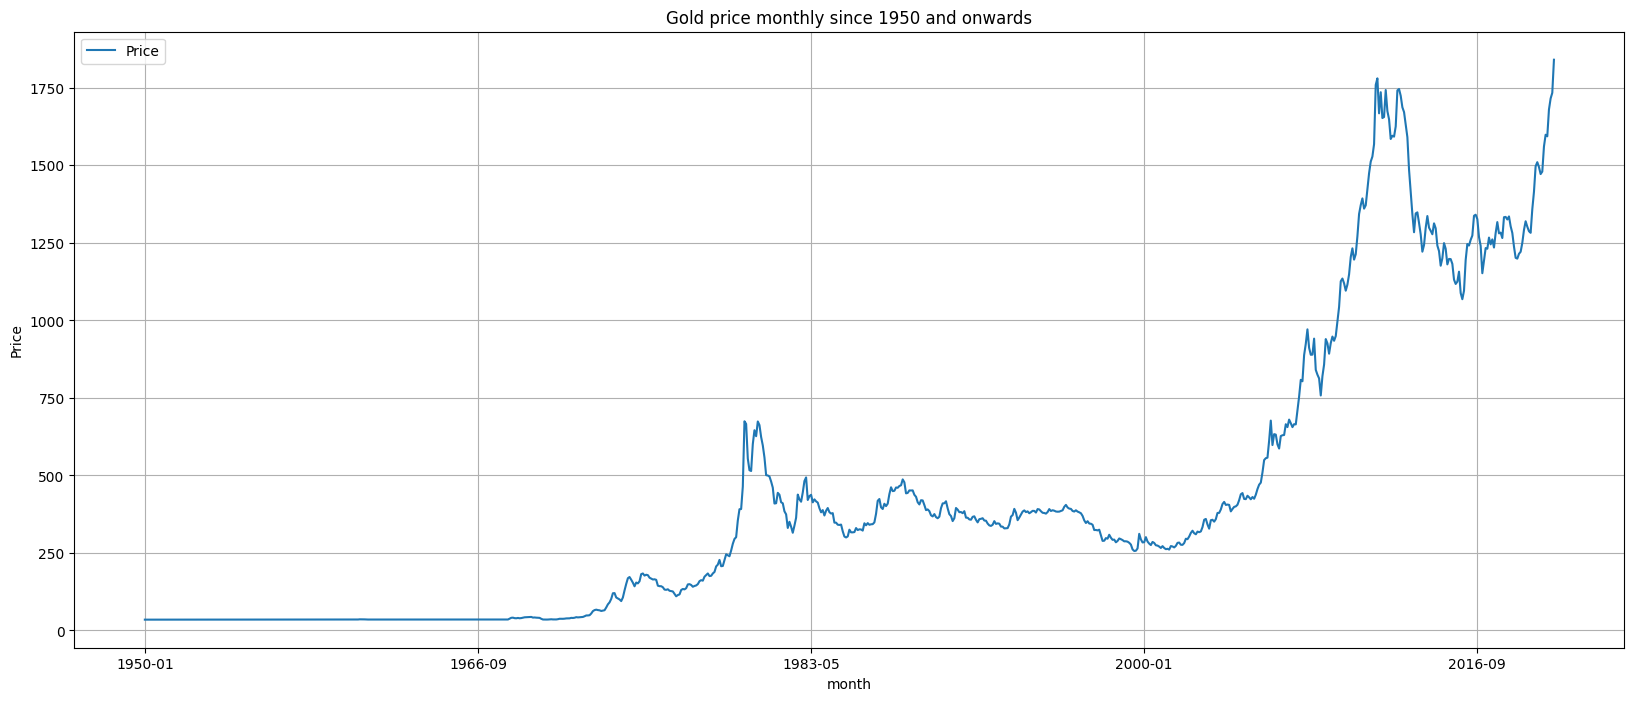

In [13]:
df.plot(figsize=(20,8))
plt.title("Gold price monthly since 1950 and onwards")
plt.xlabel("month")
plt.ylabel("Price")
plt.grid();

In [15]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Price'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['Price'], **{})
chart

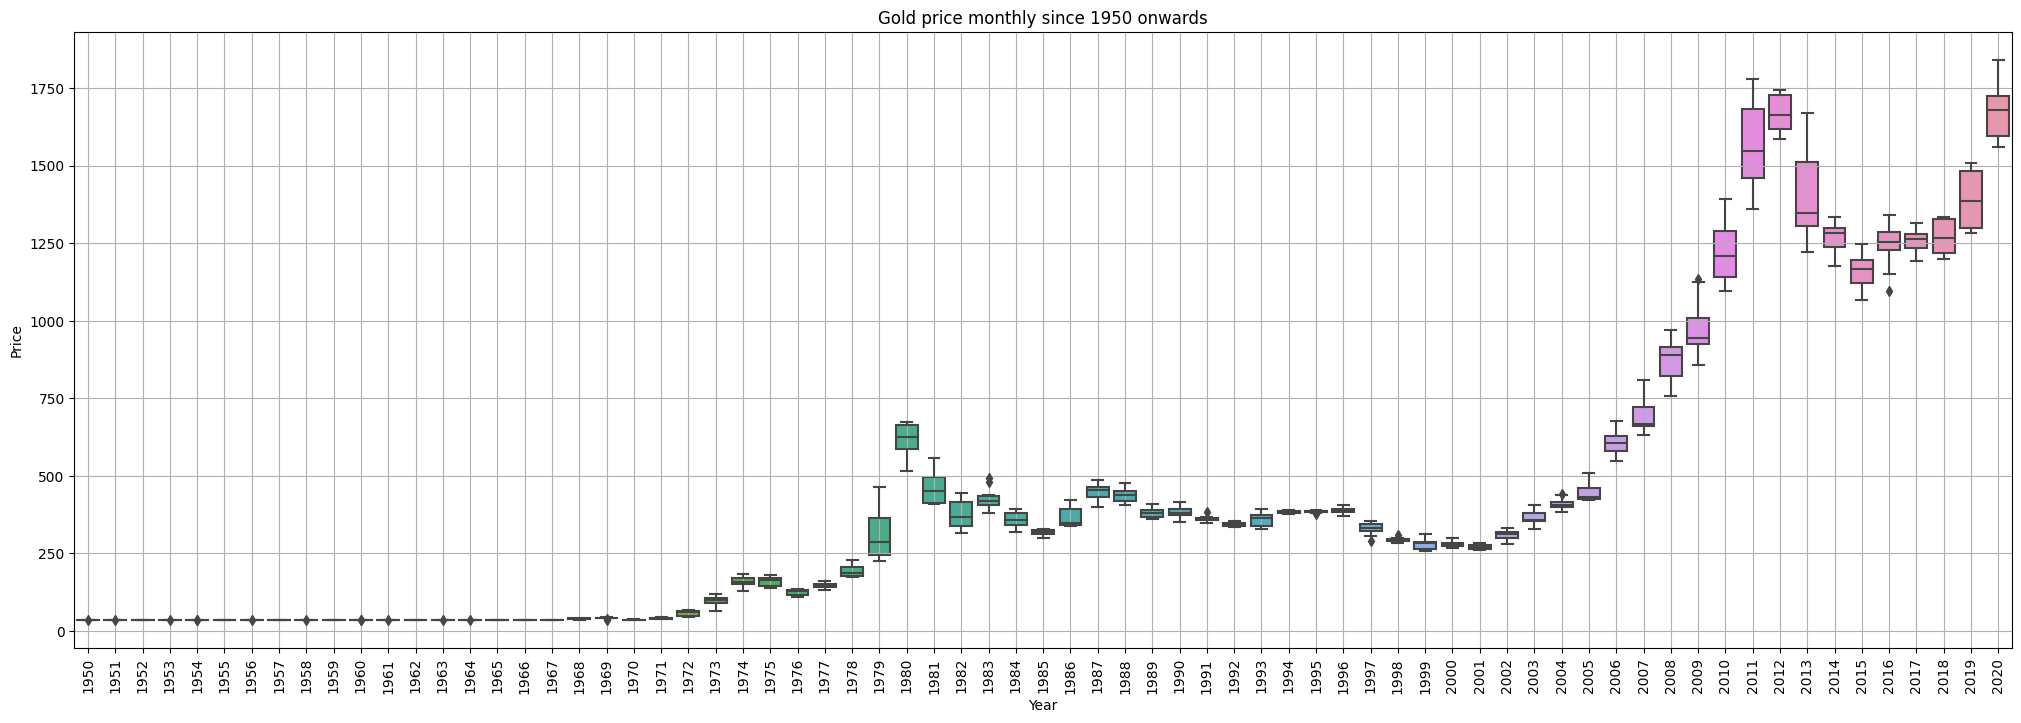

In [23]:
# Convert the index to a DateTimeIndex
df.index = pd.to_datetime(df.index)

# Create a new column for the year
df['Year'] = df.index.year

# Create the boxplot
_, ax = plt.subplots(figsize=(25, 8))
sns.boxplot(x='Year', y=df.iloc[:, 0], data=df, ax=ax)
plt.title("Gold price monthly since 1950 onwards")
plt.xlabel("Year")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.grid()



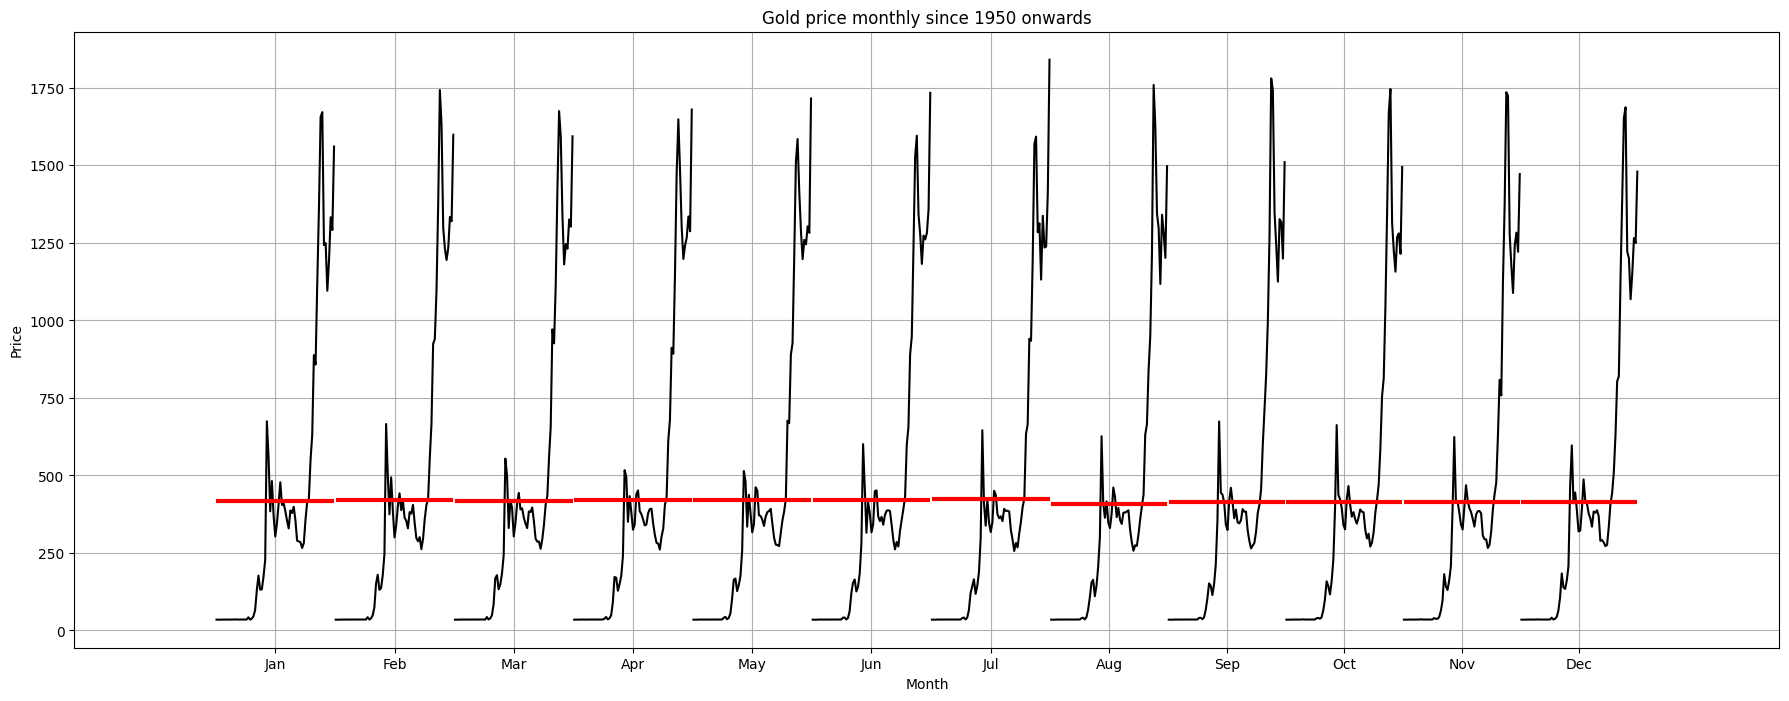

In [26]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22, 8))
month_plot(df.iloc[:, 0], ylabel='Gold price', ax=ax)
plt.title("Gold price monthly since 1950 onwards")
plt.xlabel("Month")
plt.ylabel("Price")
plt.grid()





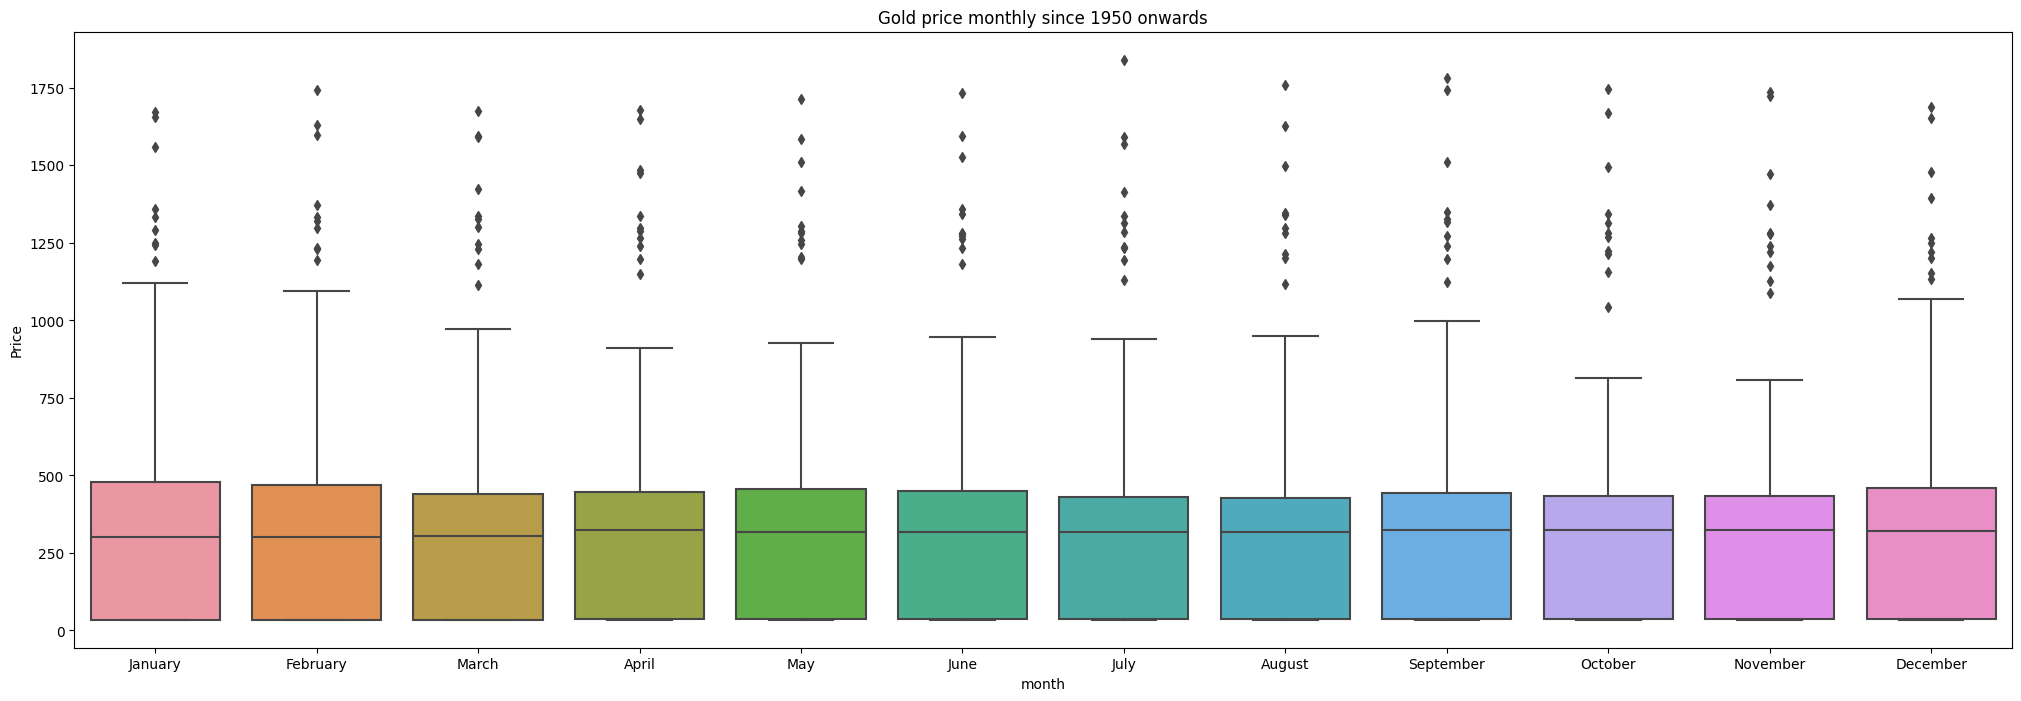

In [27]:
_, ax = plt.subplots(figsize=(25, 8))
sns.boxplot(x=df.index.month_name(), y=df.iloc[:, 0], data=df, ax=ax)
plt.title("Gold price monthly since 1950 onwards")
plt.xlabel("month")
plt.ylabel("Price")

plt.show()

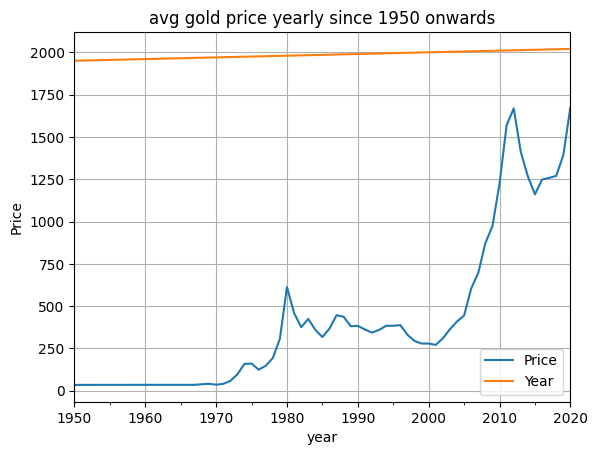

In [34]:
df_yearly_sum=df.resample('A').mean()
df_yearly_sum.plot()
plt.title("avg gold price yearly since 1950 onwards")
plt.xlabel("year")
plt.ylabel("Price")
plt.grid()


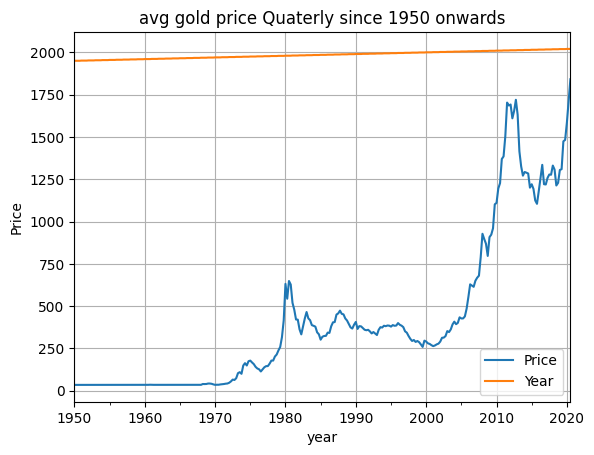

In [35]:
df_quaterly_sum=df.resample('Q').mean()
df_quaterly_sum.plot()
plt.title("avg gold price Quaterly since 1950 onwards")
plt.xlabel("year")
plt.ylabel("Price")
plt.grid()

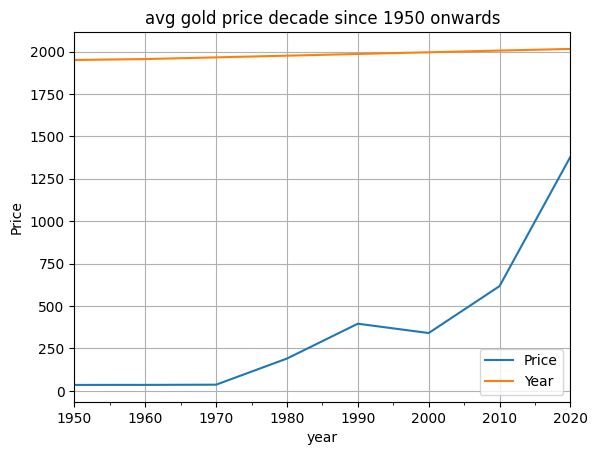

In [36]:
df_decade_sum=df.resample('10Y').mean()
df_decade_sum.plot()
plt.title("avg gold price decade since 1950 onwards")
plt.xlabel("year")
plt.ylabel("Price")
plt.grid()

In [40]:
# Calculate the mean for each year and rename the 'Price' column to 'Mean'
df_1 = df.groupby(df.index.year).mean().rename(columns={"Price": "Mean"})

# Calculate the standard deviation for each year and rename the 'Price' column to 'std'
std_df = df.groupby(df.index.year).std().rename(columns={"Price": "std"})

# Merge the mean and standard deviation DataFrames
df_1 = df_1.merge(std_df, left_index=True, right_index=True)

# Calculate the coefficient of variation (cov_pct) as a percentage
df_1["cov_pct"] = (df_1["std"] / df_1['Mean'] * 100).round(2)

df_1.head()


,Mean,Year_x,std,Year_y,cov_pct
month,,,,,
1950,34.729167,1950.0,0.002887,0.0,0.01
1951,34.717500,1951.0,0.020057,0.0,0.06
1952,34.628333,1952.0,0.117538,0.0,0.34
1953,34.879167,1953.0,0.056481,0.0,0.16
1954,35.020000,1954.0,0.082792,0.0,0.24


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_15, *['Mean'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_16, *['Year_x'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_17, *['std'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_18, *['cov_pct'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_19, *['Mean'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_20, *['Year_x'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_21, *['std'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_22, *['cov_pct'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_23, *[[['Mean', 'Year_x'], ['Year_x', 'std'], ['std', 'cov_pct']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_24, *['Year_x', 'Mean', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_25, *['Year_x', 'std', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_26, *['Year_x', 'cov_pct', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_27, *['Year_x', 'count()', None], **{})
chart

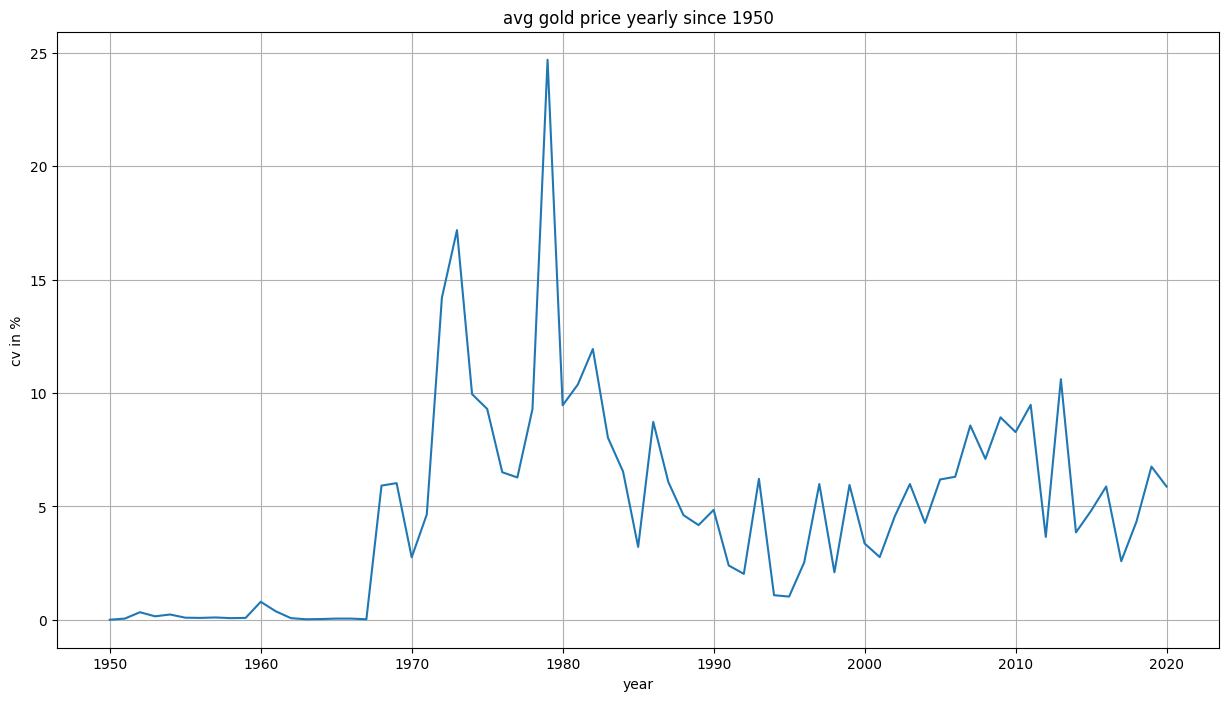

In [43]:
fig,ax=plt.subplots(figsize=(15,8))
df_1['cov_pct'].plot()
plt.title("avg gold price yearly since 1950")
plt.xlabel("year")
plt.ylabel("cv in %")
plt.grid()

In [44]:
train=df[df.index.year <= 2015]
test=df[df.index.year > 2015]

In [45]:
print(train.shape)
print(test.shape)

(792, 2)
(55, 2)


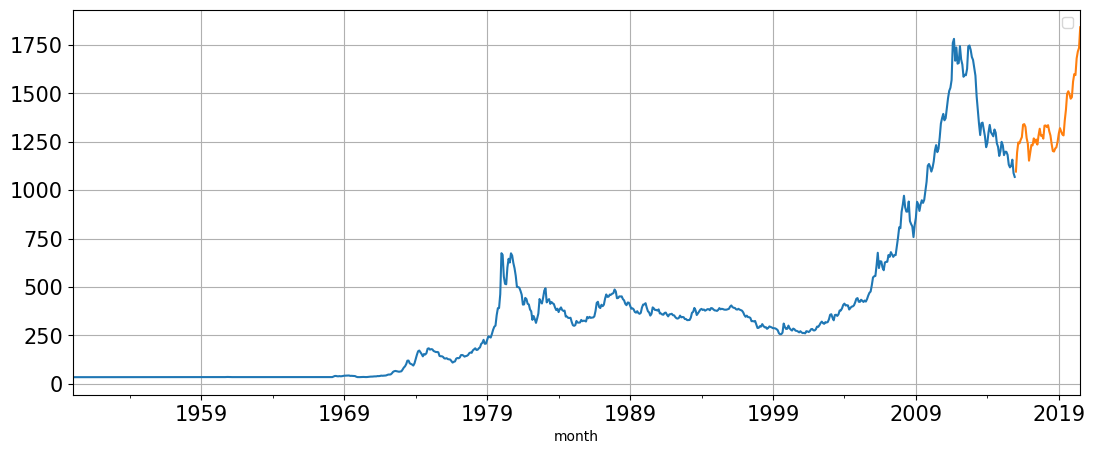

In [46]:
train['Price'].plot(figsize=(13,5),fontsize=15)
test['Price'].plot(figsize=(13,5),fontsize=15)
plt.grid()
plt.legend("training data","test data")
plt.show()


In [52]:
train_time=[i+1 for i in range(len(train))]
test_time=[i+len(train)+1 for i in range(len(test))]
len(train_time),len(test_time )

(792, 55)

In [53]:
LR_train=train.copy()
LR_test=test.copy()

In [54]:
LR_train['time']=train_time
LR_test['time']=test_time

In [58]:
lr=LinearRegression()
lr.fit(LR_train[['time']],LR_train['Price'].values)

LinearRegression()

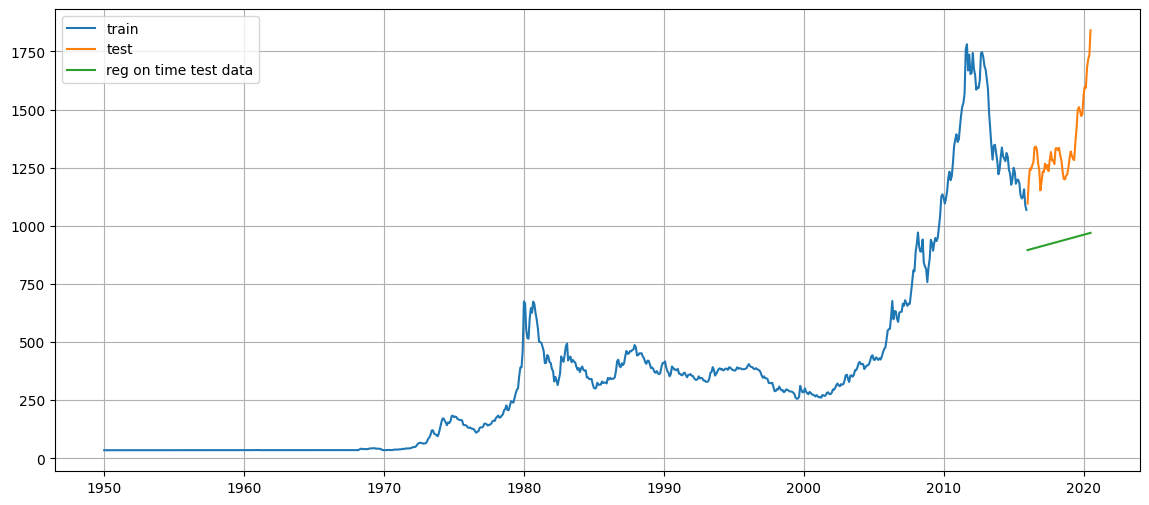

In [60]:
test_predictions_model1=lr.predict(LR_test[['time']])
LR_test['forcast']=test_predictions_model1

plt.figure(figsize=(14,6))
plt.plot(train['Price'],label='train')
plt.plot(test['Price'],label='test')
plt.plot(LR_test['forcast'],label='reg on time test data')
plt.legend(loc = 'best')
plt.grid();

In [61]:
def mape(actual,pred):
  return round((np.mean(abs(actual-pred)/actual))*100,2)


In [62]:
mape_model1_test=mape(test['Price'].values,test_predictions_model1)
print("MAPE is %3.3f"%(mape_model1_test),"%")

MAPE is 29.760 %


In [64]:
# Assuming mape_model1_test is the value you want to assign to 'Test Mape(%)'
results = pd.DataFrame({'Test Mape(%)': [mape_model1_test]}, index=['RegressionOnline'])


In [65]:
print(results)

                  Test Mape(%)
RegressionOnline         29.76


In [66]:
Naive_train=train.copy()
Naive_test=test.copy()

In [68]:
Naive_test['naive']=np.asarray(train['Price'])[len(np.asarray(train['Price']))-1]
Naive_test['naive'].head()

month
2016-01-01    1068.317
2016-02-01    1068.317
2016-03-01    1068.317
2016-04-01    1068.317
2016-05-01    1068.317
Name: naive, dtype: float64

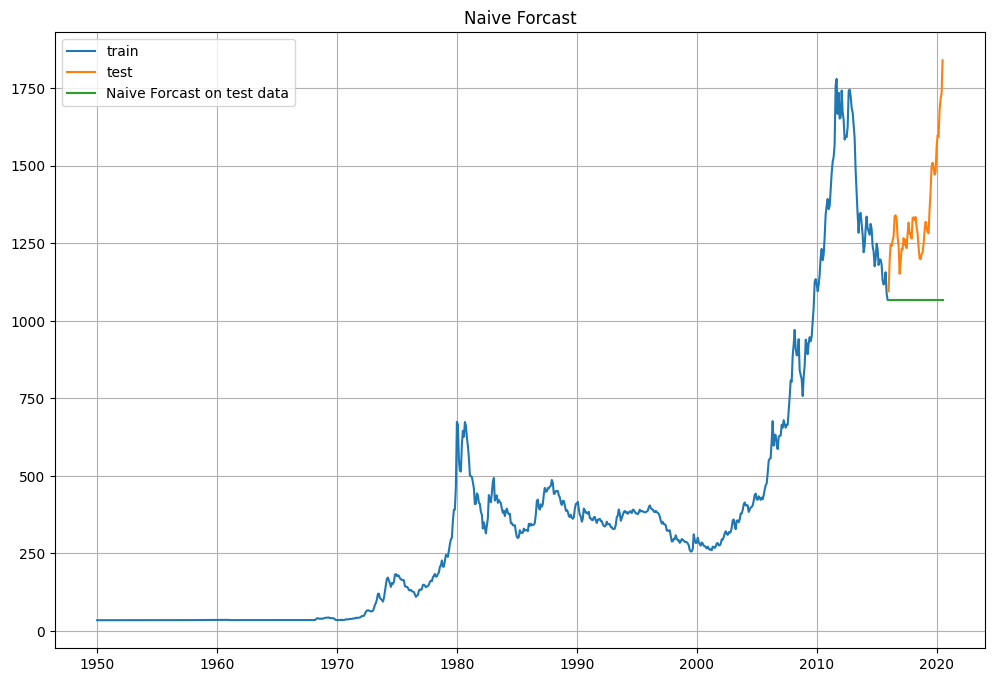

In [69]:
plt.figure(figsize=(12,8))
plt.plot(Naive_train['Price'],label='train')
plt.plot(test['Price'],label='test')
plt.plot(Naive_test['naive'],label='Naive Forcast on test data')
plt.legend(loc='best')
plt.title('Naive Forcast')
plt.grid()


In [70]:
mape_model2_test=mape(test['Price'].values,Naive_test['naive'].values)
print("MAPE is %3.3f"%(mape_model2_test),"%")

MAPE is 19.380 %


In [71]:
resultsDF_2=pd.DataFrame({'Test MAPE(%)':[mape_model2_test]},index=['NaiveModel'])
results=pd.concat([results,resultsDF_2])
results

,Test Mape(%),Test MAPE(%)
RegressionOnline,29.76,NaN
NaiveModel,NaN,19.38


In [73]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Assuming 'Price' is the column containing your time series data
time_series_data = df['Price']

# Fit the ExponentialSmoothing model
final_model = ExponentialSmoothing(time_series_data,
                                   trend='additive',
                                   seasonal='additive').fit(smoothing_level=0.4,
                                                            smoothing_trend=0.3,
                                                            smoothing_seasonal=0.6)


In [80]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Calculate MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Assuming 'Price' is the column containing your actual prices
actual_prices = df['Price'].values

# Calculate the MAPE
MAPE_final_model = mape(actual_prices, final_model.fittedvalues)
print("MAPE:", MAPE_final_model)


MAPE: 17.235142318800143


In [85]:
prediction=final_model.forecast(steps=len(test))


In [86]:
pred_df=pd.DataFrame({'lower_CI':prediction-1.96*np.std(final_model.resid,ddof=1),
                      'prediction':prediction,
                      'upper_CI':prediction+1.96*np.std(final_model.resid,ddof=1)})
pred_df.head()

,lower_CI,prediction,upper_CI
2020-08-01,1684.720065,1792.871037,1901.022009
2020-09-01,1615.306077,1723.457050,1831.608022
2020-10-01,1538.567922,1646.718895,1754.869867
2020-11-01,1476.758600,1584.909572,1693.060545
2020-12-01,1459.327290,1567.478262,1675.629235


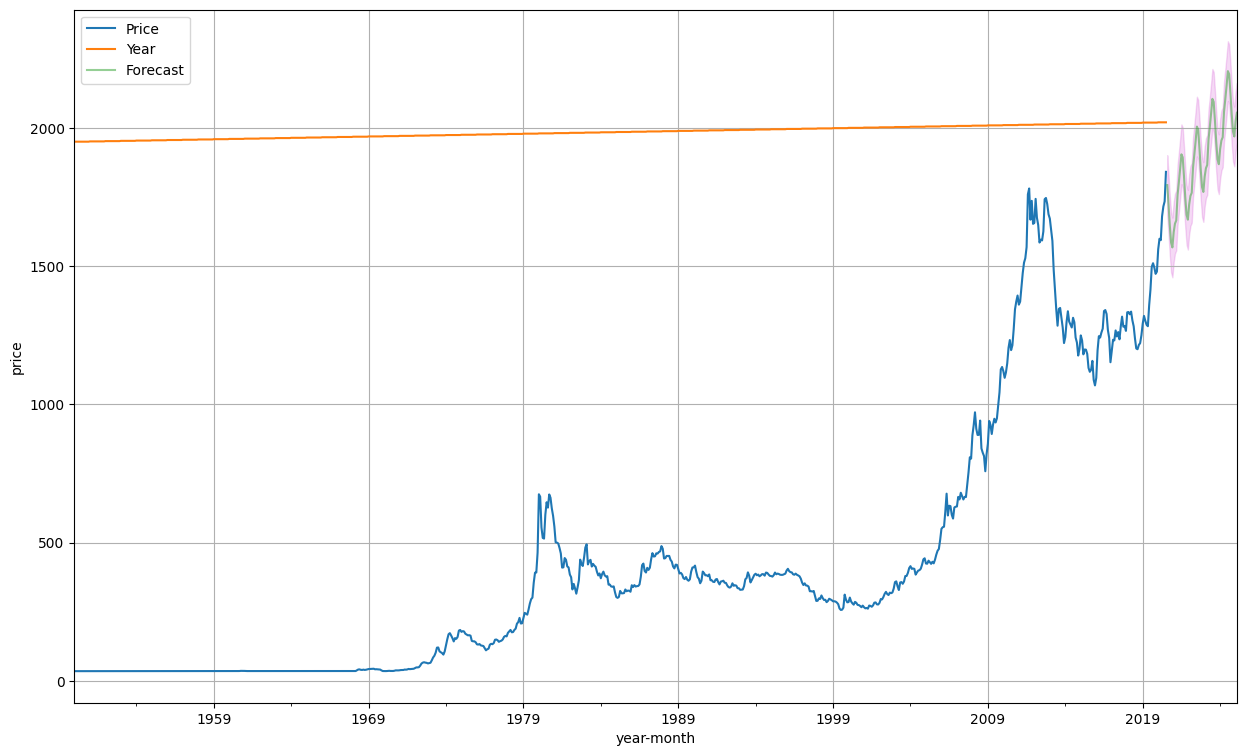

In [87]:
axis=df.plot(label='Actual',figsize=(15,9))
pred_df['prediction'].plot(ax=axis,label="Forecast",alpha=0.5)
axis.fill_between(pred_df.index,pred_df['lower_CI'],pred_df['upper_CI'],color='m',alpha=.15)
axis.set_xlabel('year-month')
axis.set_ylabel('price')
plt.legend(loc='best')
plt.grid()
plt.show()